<a href="https://colab.research.google.com/github/bwoolley99/woolley_bram_AFGdrone/blob/main/Woolley_Bram_GEOG363_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Spatial patterns of civilian-harm airstrikes in US-ocuppied Afghanistan, 2016-2018.***


> ### **Bram Woolley** | 04/27/2022 
> ### **GEOG 363: GIS Programming**

-

*College of Earth and Mineral Sciences* | *Pennsylvania State University* 

-

*Data from UCLA Drone Wars & The Bureau for Investigative Journalism*


-


---
---







## **Course Learning Objectives and Project Expectations:**

Below are Python skills and practical functionalities learned in GEOG 363, organized by the lab around which they occur.


**Bolded skills** have been specifically demonstrated in the execution of this final project:

-

*Lab 1 :*
*   **basic Python navigation**
*   **syntax and basic commands**


-

---

-

*Lab 2 :*

> *   **strings**
*   **lists (e.g. making, editing, sorting, printing from)**
    *   **making**
    *   **editing**
    *   **sorting**
    *   **printing from**

-

---

-

*Lab 3 :*
> *   **for loops**
*   **lists**
    *   **columns**
    *   **appending lists**
*   **booleans (if, elif, else, and, or, >, =, <)**
*   **coordinates**

-

---

-

*Lab 4 :*
> *  **functions**
    *   creating w/ _def_
    *   math inside functions
    *   returning values w/ _return_
    *   variables inside functions
    *   booleans inside functions
*   **importing data from Google Drive**
    *   **connecting to Drive w/ _from_, _import_, and _drive.mount()_**
    *   **importing files w/ _import os_ and _os chdir_**
*   counting classes in a list using _.count()_

-

---

-

*Lab 5 :*

> *   **Pandas and DataFrames**
    *   **importing Pandas and/or reading-in DataFrames**
    *   **Pandas-specific arithmetic and functions**
    *   **calling DataFrames and DataFrame columns**
    *   **selecting from DataFrame columns with _selected=DataFrame[[‘column1’,’column2’]]_ or with _.loc()_**
*   **CSVs**
    *   saving and exporting DataFrame data in CSV format
*   **subsetting lists**

-

---

-

*Lab 6 :*

> * **Shapely and vector data**
    *   vector point geometry 
        *   creating from input datafiles
    *   vector line geometry
    *   **vector polygon geometry**
    *   **tuple format (i.e. geometric coordinate values)**
    *   geometric calculations and functions (e.g. _.length_, _.area_, and _.centroid_)

-

---

-

*Lab 7 :*
   >*   **GeoPandas and shapefiles**
      *   **importing GeoPandas and/or importing shapefiles**
      *   **CRS and reprojections**
   *   **point-in-polygon (PIP) operations**
   *   constructing buffers around geometry
      *   selecting data within a buffer using _for_ loops
   *   flattening a "list of lists"

-

---

-

*Lab 8 :*
   > *    XArray and rasters
      *   importing NetCDF raster data and XArray
   *   regression analysis
      *   root-mean-square error
   *   time series plotting

-

---

-

*Lab 9 :*
   > *   OpenStreetMap and network data
      *   importing NetworkX network data and OpenStreetMap
      *   operations (e.g. shortest path)

-

---

-

*Lab 10 :*
   > *   Leaflet and interactive mapping
      *   zoom
      *   tile formatting
      *   layers
      *   adding points from outside data
          *    cluster view
          *    heatmapping
      *   adding polygon from outside GeoDataFrames
          *   choropleth mapping

-

---
---

## **Introduction**

From 2001 the United States invaded and militarily occupied the strategically-located nation of Afghanistan in central Asia. The subsequent asymmetric conflict between the US-led Coalition and Afghan central government against insurgents (most notably the Taliban) ground on until the Taliban's military victory in 2021. 

-

---

-

During this time, a key part of the United State's counterinsurgency campaign (a major public goal of the occupation) was the launching of airstrikes from unmanned aerial vehicles, also known as "drones". 


Often, these drone strikes were presented as "targeted killings" of key insurgent leaders. However, numerous objections have been raised to these US drone strikes, including concerns over federal executive overreach (CITE), ethics (CITE), international human rights law (CITE), legal due diligence (CITE), and the broader social implications of drone warfare in the United States and in target nations (CITE).


-

---

-


During the period of occupation, in January 2017, the United States underwent a transition of authority from the Obama Administration to the Trump Administration. Many cited President Barack Obama and President Donald Trump's opposing party affiliations, rhetoric, and macro policy stances as evidence of a potential shift in US policy (CITE). 


-

---

-

Using drone strike geospatial event data from UCLA and the Bureau of Investigative Journalism, this project analyzes the pattern of civilian casualties from US drone strikes between 01/2016-01/2017 and 01/2017-01/2018 (the eighth year of Obama's executive and the first year of Trump's executive). 

### **Data Used:**

Drone Wars point pattern conflict event data (CSV)

Geo-EPR polygon ethnographic settlement data for Afghanistan

Afghanistan polygon boundary data from the Universty of Austin (shapefile)



## **Analysis and Visualization**



### **Reading-In Packages, Scripts, & Data:**



Here I import all of the Python modules I will want for geospatial data manipulation, analysis, and visualization.

In [12]:
# importing verification module 'inspect'
import inspect

# importing open-source data analysis module 'pandas'
import pandas as pd

# installing geospatial data operations module 'geopandas'
!pip install geopandas
import geopandas as gpd

# importing planar geometric analysis module 'shapely'
from shapely.geometry import Point, LineString, Polygon
import shapely.wkt

# importing data visualization module 'matplotlib'
!pip install matplotlib==3.1.3
import matplotlib.pyplot as plt

# importing OpenStreetMap accessibility module 'osmnx'
!pip install osmnx
import osmnx as ox

# importing interactive cartography module 'folium'
import folium

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Here, I connect to my Google Drive and to the specific folder which contains my projects' datafiles: the UCLA/BIJ Drone Wars csv and the Afghanistan vector data.

In [13]:
# connecting to drive
from google.colab import drive
drive.mount('/content/drive')

# connecting to folder
import os
os.chdir('/content/drive/MyDrive/GEOG363/Final/')

# reading-in DroneWars data (csv type, point data)
drone = pd.read_csv('DroneWarsData.csv',encoding='latin-1')

# reading-in the Afghanistan boundary data (df type, polygon data)
af_bounds = gpd.read_file('AFG_adm0.shp')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Analyzing Data:**

#### **Initial Data Exploration**

Here I quickly visualize our data with matplotlib in order to explore attributes and distribution.

Here is our polygon boundary data for Afghanistan.

<AxesSubplot:>

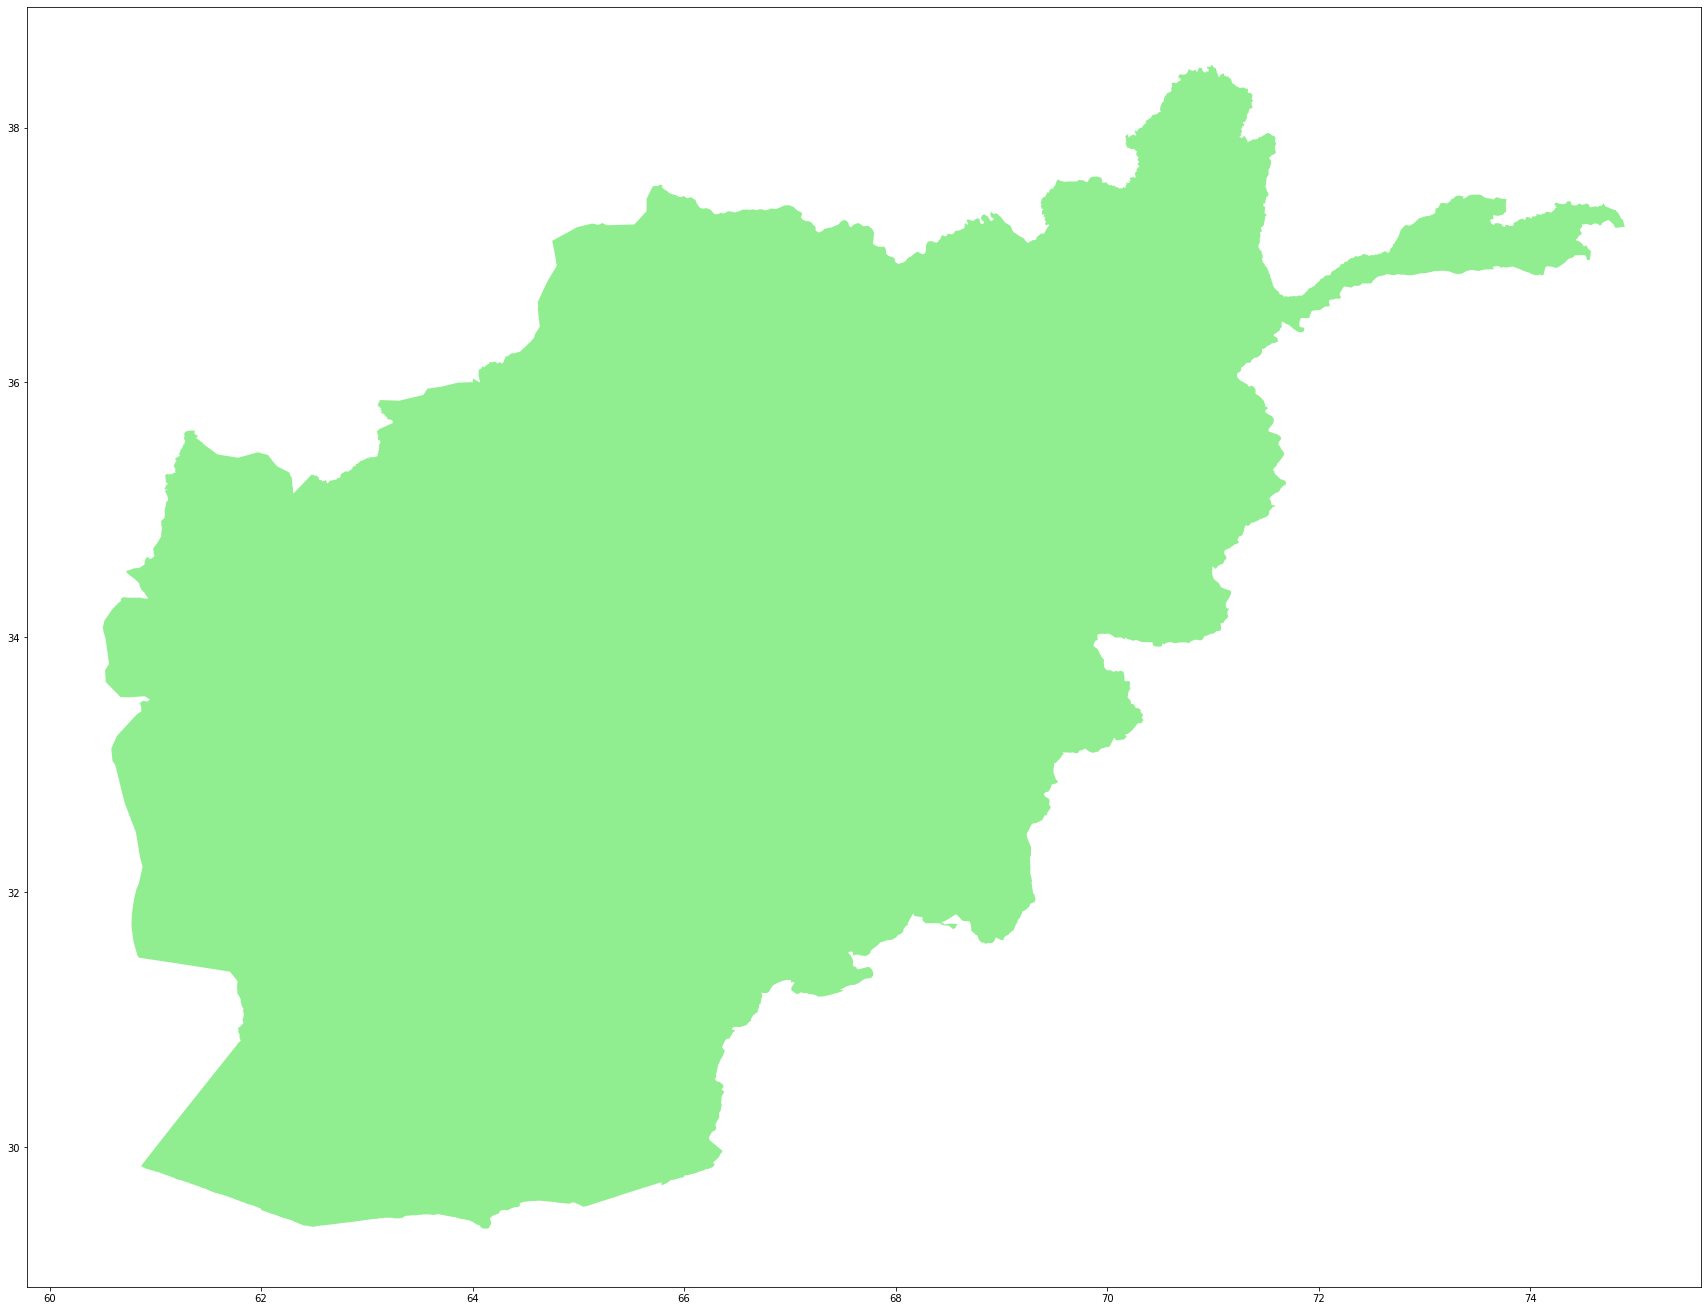

In [14]:
fig, ax = plt.subplots(figsize=(30,30))
af_bounds.plot(ax=ax, color='lightgreen')

And here are is our point pattern derived from the CSV.

#### **Kernel Density Estimates for Civilian Casualty Events**

### **Visualizing Data:**



#### **Leaflet Cartography**

## **Conclusions:**

Conclusions text.


In [15]:
# codeblock